In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-for-creditscoring/Processed Dataset 2010.csv


In [3]:
import pandas as pd

df = pd.read_csv('/kaggle/input/dataset-for-creditscoring/Processed Dataset 2010.csv')

print("Dataset shape:", df.shape)
print("Columns:", df.columns)
print("First few rows:")
print(df.head())

Dataset shape: (3454, 42)
Columns: Index(['ID', 'Weight_Ind', 'Region', 'Area_type', 'Household Number', 'Q203_1',
       'Q207a', 'Q207b', 'Q301a_1', 'Q301a_2', 'Q301a_3', 'Q301a_4', 'Q301a_5',
       'Q301a_6', 'Q301a_7', 'Q301a_8', 'Q303', 'Q304_1', 'Q401_1', 'Q503',
       'Q505b', 'Q506', 'Q507', 'Q601a', 'Q601b_1', 'Q1201', 'Q1202', 'Q1208',
       'Q1209_1', 'Q1213', 'Q1214', 'Age', 'Gender', 'Income', 'Marital',
       'Banked/Unbanked', 'Credit', 'Saving', 'Remittances', 'Education',
       'Income_Sources', 'Age2'],
      dtype='object')
First few rows:
    ID   Weight_Ind         Region Area_type  Household Number  \
0  1.0  1229.015015  Greater Accra     Urban               2.0   
1  2.0  1229.015015  Greater Accra     Urban               1.0   
2  3.0  1229.015015  Greater Accra     Urban               4.0   
3  4.0  1229.015015  Greater Accra     Urban               5.0   
4  5.0  1229.015015  Greater Accra     Urban               3.0   

                                 

In [4]:
df.isnull().sum()

ID                     1
Weight_Ind             1
Region                 1
Area_type              1
Household Number       1
Q203_1                 1
Q207a                  1
Q207b                  1
Q301a_1                1
Q301a_2                1
Q301a_3                1
Q301a_4                1
Q301a_5                1
Q301a_6                1
Q301a_7                1
Q301a_8                1
Q303                   1
Q304_1              3355
Q401_1              1375
Q503                   1
Q505b               1972
Q506                2268
Q507                2288
Q601a                  1
Q601b_1             1220
Q1201                  1
Q1202                  1
Q1208               2515
Q1209_1              929
Q1213                  6
Q1214                  1
Age                    1
Gender                 1
Income                 1
Marital                1
Banked/Unbanked        0
Credit                 0
Saving                 0
Remittances            0
Education              0


In [5]:
df.dtypes

ID                  float64
Weight_Ind          float64
Region               object
Area_type            object
Household Number    float64
Q203_1               object
Q207a                object
Q207b                object
Q301a_1              object
Q301a_2              object
Q301a_3              object
Q301a_4              object
Q301a_5              object
Q301a_6              object
Q301a_7              object
Q301a_8              object
Q303                 object
Q304_1               object
Q401_1               object
Q503                 object
Q505b                object
Q506                 object
Q507                 object
Q601a                object
Q601b_1              object
Q1201                object
Q1202                object
Q1208                object
Q1209_1              object
Q1213                object
Q1214                object
Age                  object
Gender               object
Income               object
Marital              object
Banked/Unbanked     

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                3453 non-null   float64
 1   Weight_Ind        3453 non-null   float64
 2   Region            3453 non-null   object 
 3   Area_type         3453 non-null   object 
 4   Household Number  3453 non-null   float64
 5   Q203_1            3453 non-null   object 
 6   Q207a             3453 non-null   object 
 7   Q207b             3453 non-null   object 
 8   Q301a_1           3453 non-null   object 
 9   Q301a_2           3453 non-null   object 
 10  Q301a_3           3453 non-null   object 
 11  Q301a_4           3453 non-null   object 
 12  Q301a_5           3453 non-null   object 
 13  Q301a_6           3453 non-null   object 
 14  Q301a_7           3453 non-null   object 
 15  Q301a_8           3453 non-null   object 
 16  Q303              3453 non-null   object 


In [7]:
#Rename columns appropriately
df.columns = ['ID', 'Weight_Ind', 'Region', 'Area_type', 'Household Number', 'how_get_financial_info',
       'involved_financial_decisions', 'has_money_to_spend', 'bank_current_account', 'bank_investment_account', 'bank_savings_account', 'bank_fixed_deposit_account', 'bank_debit_card',
       'bank_credit_card', 'e_zwich', 'atm_card', 'used_someone_else_bank_account', 'reason_using_someone_else_account', 'reason_no_bank_account', 'most_used_financial_service',
       'how_get_to_financial_institutions', 'other_activities_on_way_to_financial_institutions', 'time_spent_going_to_financial_institutions', 'currently_saving', 'how_people_save', 'main_income_earner', 'how_income_received', 'money_passes_through_bank_account',
       'reason_money_not_passing_through_banks', 'total_personal_income', 'total_household_income', 'Age', 'Gender', 'Income', 'Marital',
       'Banked/Unbanked', 'Credit', 'Saving', 'Remittances', 'Education',
       'Income_Sources', 'Age2']

In [8]:
for col in df.columns:
    print(df[col].unique())

[1.0000e+00 2.0000e+00 3.0000e+00 ... 9.9416e+04 9.9992e+04        nan]
[ 1229.015015   5861.456017   7315.097145   3975.596263   3301.036656
  2635.121461   4787.36722    2930.728052   4438.772569   4252.963442
  6531.336762   4916.059885   1850.986078   8388.872845   3153.059081
  4194.436466   6220.320717   5442.780606   5714.919689   1873.744127
  2713.314999   7257.040779   5051.862646   4689.164866   9236.233766
  5937.578875   4137.498355   5255.098498   1541.968219    900.8740482
  2968.789437   5137.006404   2547.039438   2406.281928    750.7283443
  2658.102162   4118.861004   7749.043585   6349.910736   5296.188525
  5621.68079    3085.068755   1818.094548    969.8434521  4795.761309
  3383.676033   3205.587805   1945.883948   2333.56967    3257.014335
  5639.460056   2122.166167   2914.170743   1138.433052   7519.280054
  3669.046308   3292.225331   3139.493195   5856.362333   5971.192958
  5587.721895   3107.457552   8956.789437   3364.981682   4649.325849
  3980.795305   

In [9]:
# df['Saving_N'].value_counts()

In [10]:
df.head()

,ID,Weight_Ind,Region,Area_type,Household Number,how_get_financial_info,involved_financial_decisions,has_money_to_spend,bank_current_account,bank_investment_account,...,Gender,Income,Marital,Banked/Unbanked,Credit,Saving,Remittances,Education,Income_Sources,Age2
0,1.0,1229.015015,Greater Accra,Urban,2.0,Broker /Representative from a financial instit...,Yes,Yes,Never had,Never had,...,Male,Yes,Married,Banked,Credit from family and friends,Saving at bank,Not remitting,Primary education,Formally employed Private,46+ yrs
1,2.0,1229.015015,Greater Accra,Urban,1.0,Broker /Representative from a financial instit...,Yes,Yes,Never had,Never had,...,Male,Yes,Divorced,Banked,Credit from family and friends,Saving at bank,Remitting informally,Primary education,Farming and Fishing,31 - 35 yrs
2,3.0,1229.015015,Greater Accra,Urban,4.0,Television,Yes,Yes,Never had,Never had,...,Female,Yes,Never married,Informal,Not borrowing,Saving informally,Not remitting,Secondary education,Self employed,31 - 35 yrs
3,4.0,1229.015015,Greater Accra,Urban,5.0,Television,Yes,Yes,Never had,Never had,...,Female,Yes,Married,Banked,Not borrowing,Saving at bank,Not remitting,No formal education,Self employed,41 - 45 yrs
4,5.0,1229.015015,Greater Accra,Urban,3.0,Television,Yes,Yes,Never had,Never had,...,Male,Yes,Married,Banked,Not borrowing,Saving at bank,Not remitting,Primary education,Self employed,46+ yrs


In [11]:
df.tail()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,ID,Weight_Ind,Region,Area_type,Household Number,how_get_financial_info,involved_financial_decisions,has_money_to_spend,bank_current_account,bank_investment_account,...,Gender,Income,Marital,Banked/Unbanked,Credit,Saving,Remittances,Education,Income_Sources,Age2
3449,93425.0,4267.821057,Upper East,Rural,2.0,Television,Yes,Yes,Never had,Never had,...,Male,Yes,Married,Banked,Credit from bank,Saving at bank,Remiting through family and friends,No formal education,Other Income,46+ yrs
3450,99262.0,9236.233766,Greater Accra,Urban,1.0,Television,Yes,Yes,Never had,Never had,...,Male,Yes,Never married,Other formal (non-bank),Not borrowing,Not saving,Remitting through other formal (non-bank),Secondary education,Informally employed,26 - 30 yrs
3451,99416.0,2968.789437,Greater Accra,Urban,8.0,Banks or other financial institutions,Yes,Yes,Never had,Never had,...,Female,Yes,Separated,Informal,Not borrowing,Saving informally,Not remitting,Primary education,Self employed,46+ yrs
3452,99992.0,1644.672484,Upper East,Rural,2.0,Friends/Colleagues,Yes,No,Never had,Never had,...,Male,Yes,Widowed,Excluded,Not borrowing,Saving at home,Remiting through family and friends,No formal education,Farming and Fishing,46+ yrs
3453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Excluded,Not borrowing,Not saving,Not remitting,Other/Dont know,Dont Know,NaN


In [12]:
# df['Gender'].replace({True:1, False:0}, inplace=True)

In [13]:
# df['Gender'] = df['Gender'].fillna(df['Gender'].mean())

In [14]:
# df['Gender'].unique()

In [15]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())


Unique values in Region:
['Greater Accra' 'Ashanti' 'Western' 'Central' 'Volta' 'Eastern'
 'Upper West' 'Brong Ahafo' 'Northern' 'Upper East' nan]

Unique values in Area_type:
['Urban' 'Rural' nan]

Unique values in how_get_financial_info:
['Broker /Representative from a financial institution' 'Television'
 'Friends/Colleagues' 'Radio' "Can't remember/ Don't know"
 'Household members' 'Banks or other financial institutions' 'Billboards'
 'Union Leaders' 'Flyers and brochures' 'University/School'
 'Community groups/society' 'Newspaper' 'Internet'
 'Not answered/Missing data' 'Magazines' 'Susu operators'
 'Community leaders' nan]

Unique values in involved_financial_decisions:
['Yes' 'No' 'Not answered/Missing data' nan]

Unique values in has_money_to_spend:
['Yes' 'No' 'Not answered/Missing data' nan]

Unique values in bank_current_account:
['Never had' 'Have now' 'Not answered/Missing data'
 'Used to but no longer have' nan]

Unique values in bank_investment_account:
['Never had' 'Hav

In [16]:
# #Fill empty numerical rows with median
# numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
# df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# #Ffill empty categorical rows with Unknown
# df[categorical_cols] = df[categorical_cols].fillna("Unknown")

In [17]:
#Drop duplicates
df.drop_duplicates()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,ID,Weight_Ind,Region,Area_type,Household Number,how_get_financial_info,involved_financial_decisions,has_money_to_spend,bank_current_account,bank_investment_account,...,Gender,Income,Marital,Banked/Unbanked,Credit,Saving,Remittances,Education,Income_Sources,Age2
0,1.0,1229.015015,Greater Accra,Urban,2.0,Broker /Representative from a financial instit...,Yes,Yes,Never had,Never had,...,Male,Yes,Married,Banked,Credit from family and friends,Saving at bank,Not remitting,Primary education,Formally employed Private,46+ yrs
1,2.0,1229.015015,Greater Accra,Urban,1.0,Broker /Representative from a financial instit...,Yes,Yes,Never had,Never had,...,Male,Yes,Divorced,Banked,Credit from family and friends,Saving at bank,Remitting informally,Primary education,Farming and Fishing,31 - 35 yrs
2,3.0,1229.015015,Greater Accra,Urban,4.0,Television,Yes,Yes,Never had,Never had,...,Female,Yes,Never married,Informal,Not borrowing,Saving informally,Not remitting,Secondary education,Self employed,31 - 35 yrs
3,4.0,1229.015015,Greater Accra,Urban,5.0,Television,Yes,Yes,Never had,Never had,...,Female,Yes,Married,Banked,Not borrowing,Saving at bank,Not remitting,No formal education,Self employed,41 - 45 yrs
4,5.0,1229.015015,Greater Accra,Urban,3.0,Television,Yes,Yes,Never had,Never had,...,Male,Yes,Married,Banked,Not borrowing,Saving at bank,Not remitting,Primary education,Self employed,46+ yrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,93425.0,4267.821057,Upper East,Rural,2.0,Television,Yes,Yes,Never had,Never had,...,Male,Yes,Married,Banked,Credit from bank,Saving at bank,Remiting through family and friends,No formal education,Other Income,46+ yrs
3450,99262.0,9236.233766,Greater Accra,Urban,1.0,Television,Yes,Yes,Never had,Never had,...,Male,Yes,Never married,Other formal (non-bank),Not borrowing,Not saving,Remitting through other formal (non-bank),Secondary education,Informally employed,26 - 30 yrs
3451,99416.0,2968.789437,Greater Accra,Urban,8.0,Banks or other financial institutions,Yes,Yes,Never had,Never had,...,Female,Yes,Separated,Informal,Not borrowing,Saving informally,Not remitting,Primary education,Self employed,46+ yrs
3452,99992.0,1644.672484,Upper East,Rural,2.0,Friends/Colleagues,Yes,No,Never had,Never had,...,Male,Yes,Widowed,Excluded,Not borrowing,Saving at home,Remiting through family and friends,No formal education,Farming and Fishing,46+ yrs


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 42 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 3453 non-null   float64
 1   Weight_Ind                                         3453 non-null   float64
 2   Region                                             3453 non-null   object 
 3   Area_type                                          3453 non-null   object 
 4   Household Number                                   3453 non-null   float64
 5   how_get_financial_info                             3453 non-null   object 
 6   involved_financial_decisions                       3453 non-null   object 
 7   has_money_to_spend                                 3453 non-null   object 
 8   bank_current_account                               3453 non-null   object 
 9   bank_inv

In [19]:
df.columns

Index(['ID', 'Weight_Ind', 'Region', 'Area_type', 'Household Number',
       'how_get_financial_info', 'involved_financial_decisions',
       'has_money_to_spend', 'bank_current_account', 'bank_investment_account',
       'bank_savings_account', 'bank_fixed_deposit_account', 'bank_debit_card',
       'bank_credit_card', 'e_zwich', 'atm_card',
       'used_someone_else_bank_account', 'reason_using_someone_else_account',
       'reason_no_bank_account', 'most_used_financial_service',
       'how_get_to_financial_institutions',
       'other_activities_on_way_to_financial_institutions',
       'time_spent_going_to_financial_institutions', 'currently_saving',
       'how_people_save', 'main_income_earner', 'how_income_received',
       'money_passes_through_bank_account',
       'reason_money_not_passing_through_banks', 'total_personal_income',
       'total_household_income', 'Age', 'Gender', 'Income', 'Marital',
       'Banked/Unbanked', 'Credit', 'Saving', 'Remittances', 'Education',
  

In [20]:
#Rename columns appropriately
df.columns = ['ID', 'Weight_Ind', 'Region', 'Area_type', 'Household Number', 'how_get_financial_info',
       'involved_financial_decisions', 'has_money_to_spend', 'bank_current_account', 'bank_investment_account', 'bank_savings_account', 'bank_fixed_deposit_account', 'bank_debit_card',
       'bank_credit_card', 'e_zwich', 'atm_card', 'used_someone_else_bank_account', 'reason_using_someone_else_account', 'reason_no_bank_account', 'most_used_financial_service',
       'how_get_to_financial_institutions', 'other_activities_on_way_to_financial_institutions', 'time_spent_going_to_financial_institutions', 'currently_saving', 'how_people_save', 'main_income_earner', 'how_income_received', 'money_passes_through_bank_account',
       'reason_money_not_passing_through_banks', 'total_personal_income', 'total_household_income', 'Age', 'Gender', 'Income', 'Marital',
       'Banked/Unbanked', 'Credit', 'Saving', 'Remittances', 'Education',
       'Income_Sources', 'Age2']

In [21]:
df.columns

Index(['ID', 'Weight_Ind', 'Region', 'Area_type', 'Household Number',
       'how_get_financial_info', 'involved_financial_decisions',
       'has_money_to_spend', 'bank_current_account', 'bank_investment_account',
       'bank_savings_account', 'bank_fixed_deposit_account', 'bank_debit_card',
       'bank_credit_card', 'e_zwich', 'atm_card',
       'used_someone_else_bank_account', 'reason_using_someone_else_account',
       'reason_no_bank_account', 'most_used_financial_service',
       'how_get_to_financial_institutions',
       'other_activities_on_way_to_financial_institutions',
       'time_spent_going_to_financial_institutions', 'currently_saving',
       'how_people_save', 'main_income_earner', 'how_income_received',
       'money_passes_through_bank_account',
       'reason_money_not_passing_through_banks', 'total_personal_income',
       'total_household_income', 'Age', 'Gender', 'Income', 'Marital',
       'Banked/Unbanked', 'Credit', 'Saving', 'Remittances', 'Education',
  

In [22]:
#Replacing any other value in Banked/Unbanked which is not banked as Unbanked
df['Banked/Unbanked'].replace({'Informal':'Unbanked', 'Excluded':'Unbanked',
                               'Other formal (non-bank)':'Unbanked'}, inplace=True)

<ipython-input-22-cdbf48c36a4f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Banked/Unbanked'].replace({'Informal':'Unbanked', 'Excluded':'Unbanked',


In [23]:
#Making banked/unbanked a numerical column
df['Banked/Unbanked'].replace({'Unbanked':1, 'Banked':0}, inplace=True)

<ipython-input-23-bedb468139ca>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Banked/Unbanked'].replace({'Unbanked':1, 'Banked':0}, inplace=True)


Target variable distribution:
Banked/Unbanked
1    2264
0    1190
Name: count, dtype: int64


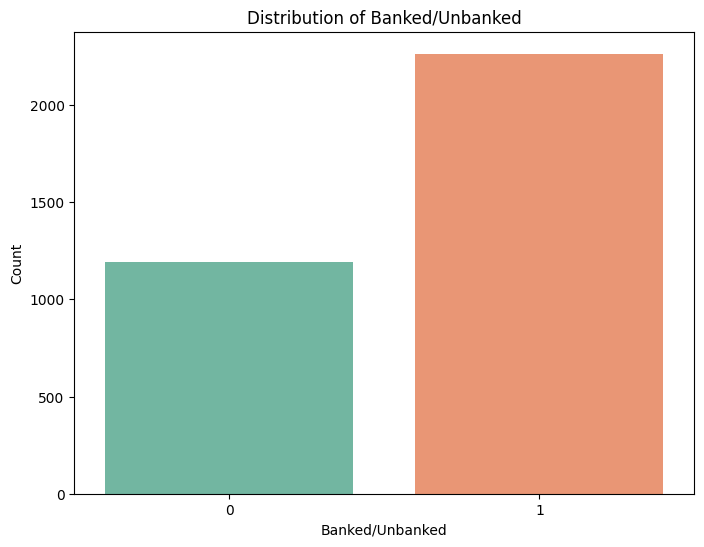

In [24]:
print("Target variable distribution:")
print(df['Banked/Unbanked'].value_counts())

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Banked/Unbanked', palette='Set2')
plt.title("Distribution of Banked/Unbanked")
plt.xlabel("Banked/Unbanked")
plt.ylabel("Count")
plt.show()

Summary statistics for numerical features:
                 ID    Weight_Ind  Household Number  Banked/Unbanked
count   3453.000000   3453.000000       3453.000000      3454.000000
mean    2479.973067   3857.171659          2.786852         0.655472
std     7188.440230   1914.390278          1.758535         0.475283
min        1.000000    645.896282          1.000000         0.000000
25%      934.000000   2415.339458          2.000000         0.000000
50%     1883.000000   3523.011086          2.000000         1.000000
75%     2809.000000   4833.822879          4.000000         1.000000
max    99992.000000  12441.424730         15.000000         1.000000


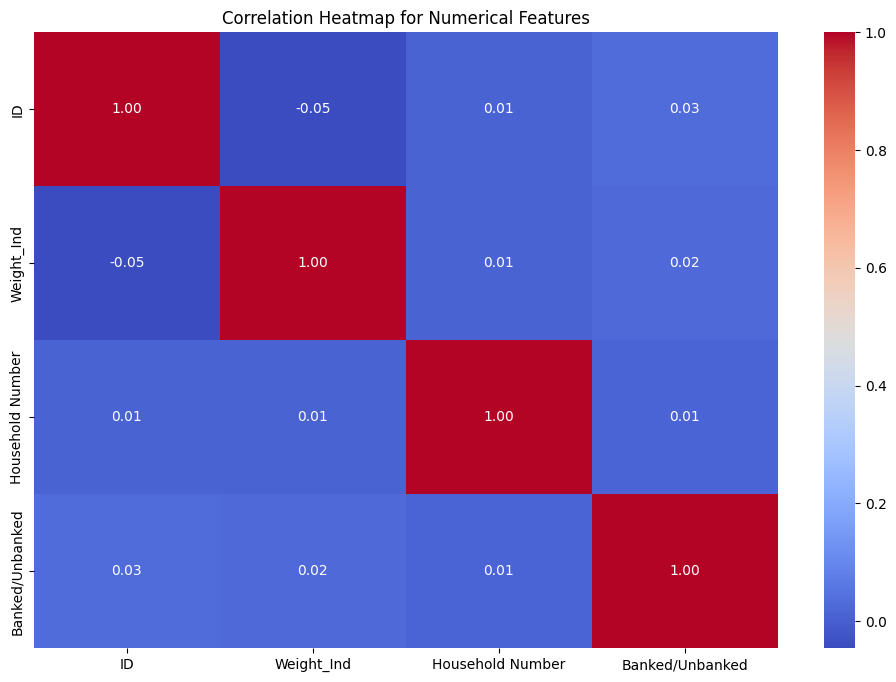

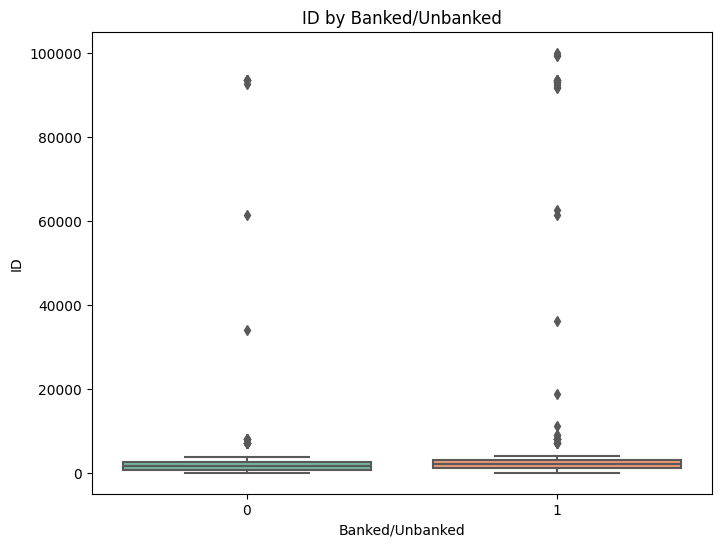

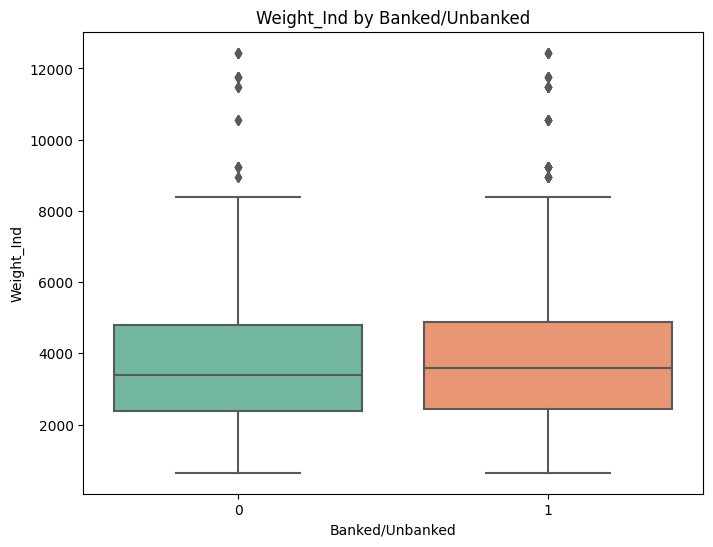

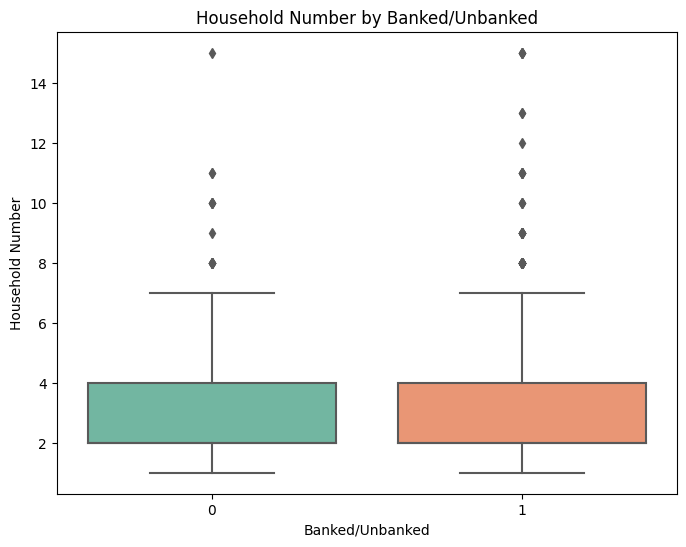

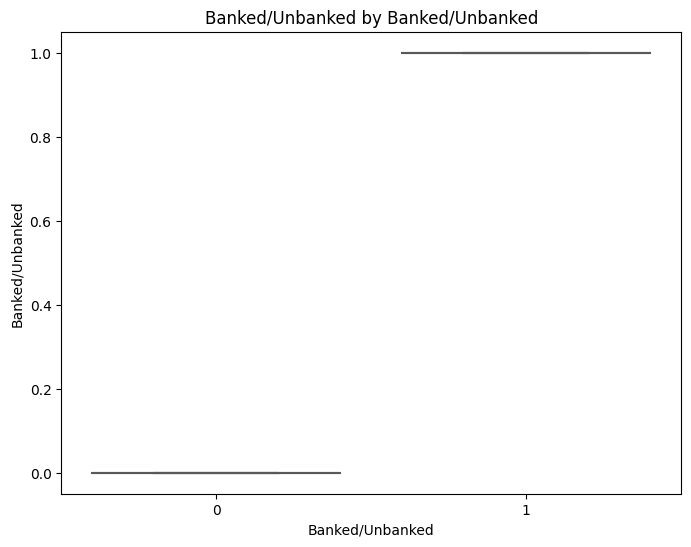

In [25]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Summary statistics for numerical features:")
print(df[numerical_cols].describe()) #Statistical information about numerical cols

plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap for Numerical Features")
plt.show()

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='Banked/Unbanked', y=col, palette='Set2')
    plt.title(f"{col} by Banked/Unbanked")
    plt.show()

In [26]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

#Categorical distributions specifying the distribution for Banked/Unbanked
# for col in categorical_cols:
#     if col != 'Banked/Unbanked': 
#         plt.figure(figsize=(8, 6))
#         sns.countplot(data=df, x=col, hue='Banked/Unbanked', palette='Set2')
#         plt.title(f"Distribution of {col} by Banked/Unbanked")
#         plt.xticks(rotation=45)
#         plt.show()

In [27]:
!pip install bioinfokit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.4-py3-none-any.whl size=59221 sha256=cb69e473b9e0ea62edf9235b7d877160f4d192ca4844d8455066ae710f31edfb
  Stored in directory: /root/.cache/pip/wheels/45/b1/91/212510cab723ee76a25180836e8897f926820382374184b017
Successfully built bioinfokit


In [28]:

from bioinfokit.analys import stat
def test_association(df,x,y):
    '''
    This function displays conducts a chi-square test and displays the output
    '''
    table = pd.crosstab(df[x],df[y])
    test=stat()
    test.chisq(df=table)
    
    
    print('Null hypothesis: {} and {} are Independent'.format(x,y))
    print('Alternative hypothesis: {} and {} are Dependent\n'.format(x,y))
    print('Test results')
    print('='*55)
    print('Observed frequency values \n')
    print(table)
    
    print('*'*55)
    print(test.expected_df)
    print('*'*55)
    print(test.summary) 

for col in categorical_cols:
    test_association(df,'Banked/Unbanked', col)

Null hypothesis: Banked/Unbanked and Region are Independent
Alternative hypothesis: Banked/Unbanked and Region are Dependent

Test results
Observed frequency values 

Region           Ashanti  Brong Ahafo  Central  Eastern  Greater Accra  \
Banked/Unbanked                                                          
0                    261           89      108      135            256   
1                    379          236      175      235            274   

Region           Northern  Upper East  Upper West  Volta  Western  
Banked/Unbanked                                                    
0                      57          59          35     66      124  
1                     270         140         127    220      207  
*******************************************************

Expected frequency counts

      Ashanti    Brong Ahafo    Central    Eastern    Greater Accra    Northern    Upper East    Upper West     Volta    Western
--  ---------  -------------  ---------  --------- 

Missing values per column:
ID                                                      1
Weight_Ind                                              1
Region                                                  1
Area_type                                               1
Household Number                                        1
how_get_financial_info                                  1
involved_financial_decisions                            1
has_money_to_spend                                      1
bank_current_account                                    1
bank_investment_account                                 1
bank_savings_account                                    1
bank_fixed_deposit_account                              1
bank_debit_card                                         1
bank_credit_card                                        1
e_zwich                                                 1
atm_card                                                1
used_someone_else_bank_account               

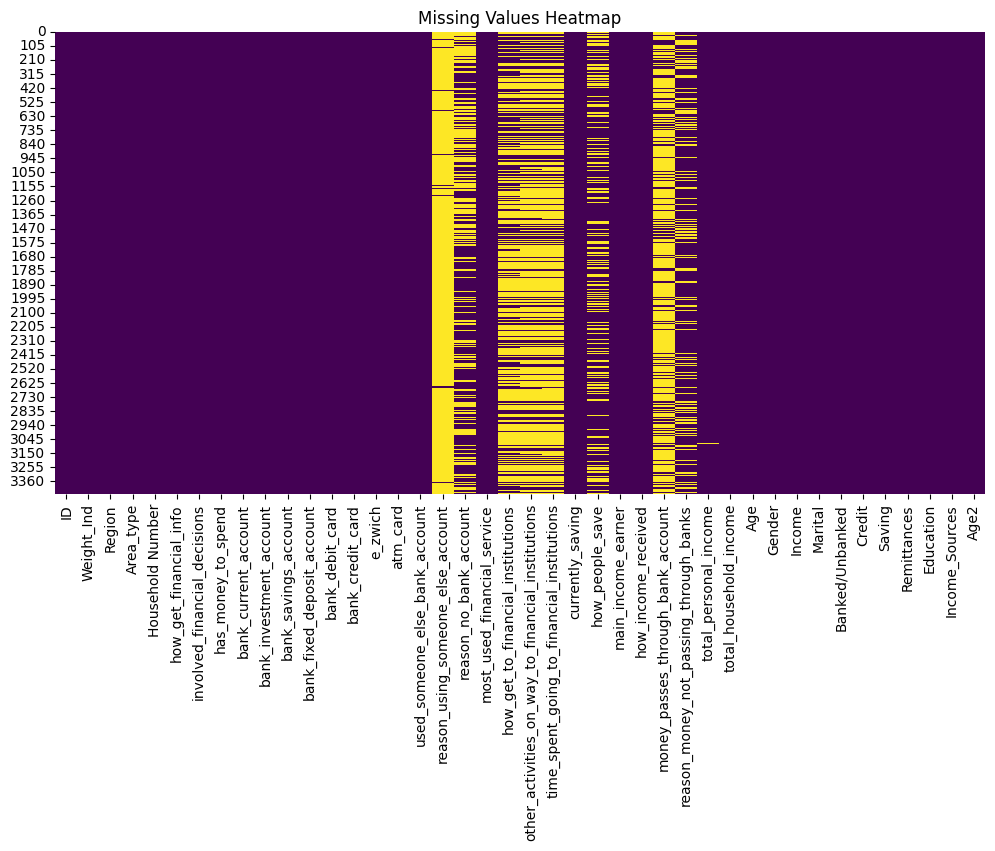

In [29]:
print("Missing values per column:")
print(df.isnull().sum())

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


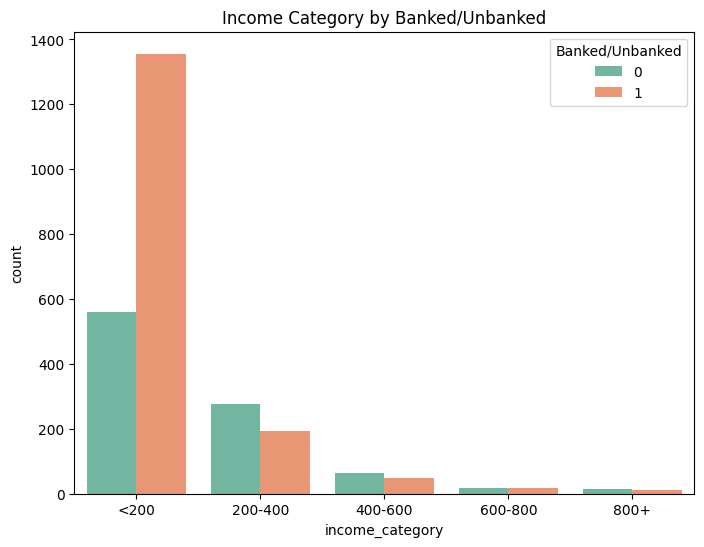

In [30]:
income_mapping = {
    'Below GH¢200 per month': 100,  
    'GH¢201 - GH¢400 per month': 300,  
    'GH¢401 - GH¢600 per month': 500,
    'GH¢601 - GH¢800 per month': 700,
    'GH¢801 - GH¢1000 per month': 900,
    'Above GH¢1000 per month': 1200  
}

df['total_personal_income'] = df['total_personal_income'].map(income_mapping) # mapping column values against income_mapping for visualization

df['income_category'] = pd.cut(
    df['total_personal_income'],
    bins=[0, 200, 400, 600, 800, float('inf')],  # Numeric bins
    labels=['<200', '200-400', '400-600', '600-800', '800+']  # String labels
)


plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='income_category', hue='Banked/Unbanked', palette='Set2')
plt.title("Income Category by Banked/Unbanked")
plt.show()

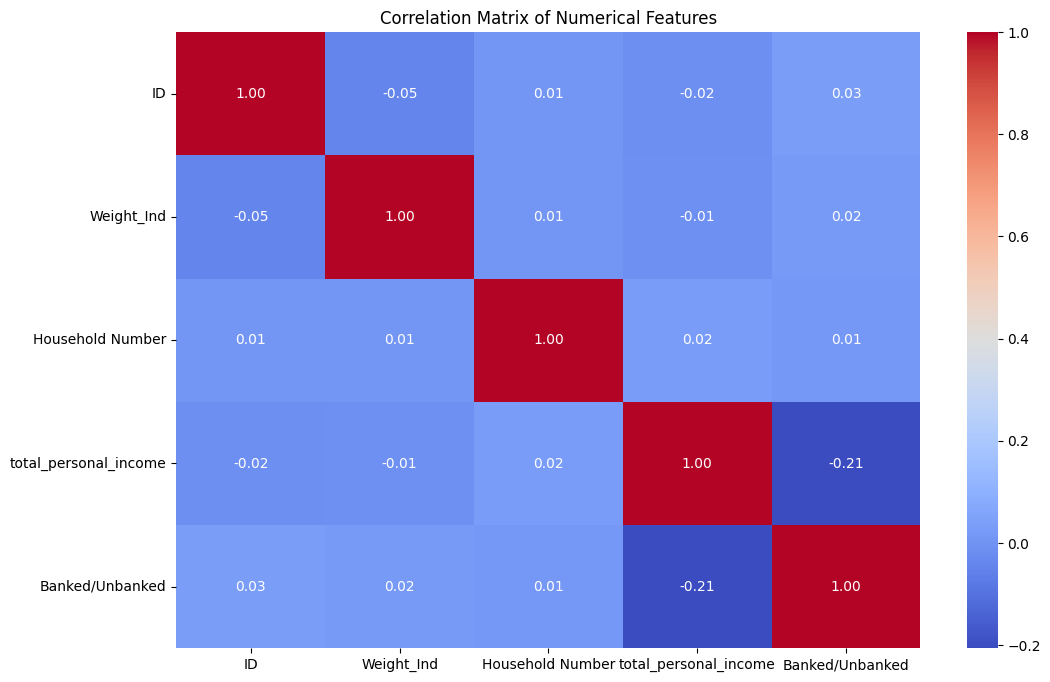

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [32]:
# categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# #Crosstab for categorical_cols against banked/unbanked
# # for col in categorical_cols:
# #     if col != 'Banked/Unbanked': 
# #         cross_tab = pd.crosstab(df[col], df['Banked/Unbanked'], normalize='index')
# #         print(f"Cross-tab for {col}:")
# #         print(cross_tab)
# #         print("\n")

In [37]:
#Replacing unimportant values with nan
import numpy as np
df['Marital'].replace({'Not Answered/Missing data':np.nan}, inplace=True)

In [38]:
df['total_personal_income'].replace({"Don't know":np.nan, 'Refused to answer':np.nan}, inplace=True)

<ipython-input-38-1259d9fe2587>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_personal_income'].replace({"Don't know":np.nan, 'Refused to answer':np.nan}, inplace=True)


In [39]:
df['total_household_income'].replace({"Don't know":np.nan, 'Refused to answer':np.nan,
                     'Not answered/Missing Data':np.nan}, inplace=True)

In [40]:
df.total_personal_income.unique()

array([100., 300.,  nan, 500., 700., 900.])

In [41]:
df.columns

Index(['ID', 'Weight_Ind', 'Region', 'Area_type', 'Household Number',
       'how_get_financial_info', 'involved_financial_decisions',
       'has_money_to_spend', 'bank_current_account', 'bank_investment_account',
       'bank_savings_account', 'bank_fixed_deposit_account', 'bank_debit_card',
       'bank_credit_card', 'e_zwich', 'atm_card',
       'used_someone_else_bank_account', 'reason_using_someone_else_account',
       'reason_no_bank_account', 'most_used_financial_service',
       'how_get_to_financial_institutions',
       'other_activities_on_way_to_financial_institutions',
       'time_spent_going_to_financial_institutions', 'currently_saving',
       'how_people_save', 'main_income_earner', 'how_income_received',
       'money_passes_through_bank_account',
       'reason_money_not_passing_through_banks', 'total_personal_income',
       'total_household_income', 'Age', 'Gender', 'Income', 'Marital',
       'Banked/Unbanked', 'Credit', 'Saving', 'Remittances', 'Education',
  

In [42]:
df.dtypes

ID                                                    float64
Weight_Ind                                            float64
Region                                                 object
Area_type                                              object
Household Number                                      float64
how_get_financial_info                                 object
involved_financial_decisions                           object
has_money_to_spend                                     object
bank_current_account                                   object
bank_investment_account                                object
bank_savings_account                                   object
bank_fixed_deposit_account                             object
bank_debit_card                                        object
bank_credit_card                                       object
e_zwich                                                object
atm_card                                               object
used_som

In [43]:
#Copying useful columns
df = df[['Region','Area_type','Household Number','Age','bank_current_account', 'main_income_earner', 'bank_investment_account', 'bank_debit_card', 'bank_credit_card', 'atm_card', 'most_used_financial_service', 'time_spent_going_to_financial_institutions', 'how_people_save', 'money_passes_through_bank_account',
         'Marital', 'Credit', 'Saving', 'Remittances', 'Education', 'Income_Sources', 'Banked/Unbanked']]

In [44]:
df.head()

,Region,Area_type,Household Number,Age,bank_current_account,main_income_earner,bank_investment_account,bank_debit_card,bank_credit_card,atm_card,...,time_spent_going_to_financial_institutions,how_people_save,money_passes_through_bank_account,Marital,Credit,Saving,Remittances,Education,Income_Sources,Banked/Unbanked
0,Greater Accra,Urban,2.0,50,Never had,Yes,Never had,Never had,Never had,Never had,...,10 to 20 minutes,Bank,NaN,Married,Credit from family and friends,Saving at bank,Not remitting,Primary education,Formally employed Private,0
1,Greater Accra,Urban,1.0,31,Never had,Yes,Never had,Never had,Never had,Never had,...,Between I to 2 hours,Bank,NaN,Divorced,Credit from family and friends,Saving at bank,Remitting informally,Primary education,Farming and Fishing,0
2,Greater Accra,Urban,4.0,32,Never had,Yes,Never had,Never had,Never had,Never had,...,NaN,Susu collector / group,NaN,Never married,Not borrowing,Saving informally,Not remitting,Secondary education,Self employed,1
3,Greater Accra,Urban,5.0,45,Never had,DK,Never had,Never had,Never had,Never had,...,NaN,At home/secret hiding place,NaN,Married,Not borrowing,Saving at bank,Not remitting,No formal education,Self employed,0
4,Greater Accra,Urban,3.0,55,Never had,No,Never had,Never had,Never had,Never had,...,NaN,NaN,NaN,Married,Not borrowing,Saving at bank,Not remitting,Primary education,Self employed,0


In [45]:
for col in df.columns:
    print(col)
    print(df[col].unique())

Region
['Greater Accra' 'Ashanti' 'Western' 'Central' 'Volta' 'Eastern'
 'Upper West' 'Brong Ahafo' 'Northern' 'Upper East' nan]
Area_type
['Urban' 'Rural' nan]
Household Number
[ 2.  1.  4.  5.  3.  7.  6.  9.  8. 11. 13. 12. 15. 10. nan]
Age
['50' '31' '32' '45' '55' '38' '20' '18' '60' '24' '48' '29' '23' '80'
 '21' '37' '42' '30' '61' '27' '67' '25' '26' '28' '76' '41' '34' '35'
 '78' '22' '53' '52' '71' '46' '74' '40' '63' '68' '54' '49' '36' '19'
 '33' '65' '58' '69' '72' '62' '85' '51' '73' 'Not indicated' '39' '47'
 '59' '66' '70' '75' '44' '89' '81' '77' '57' '56' '43' '64' '86' '99'
 '88' '96' '79' '90' '84' '82' '95' '83' '97' '98' nan]
bank_current_account
['Never had' 'Have now' 'Not answered/Missing data'
 'Used to but no longer have' nan]
main_income_earner
['Yes' 'DK' 'No' 'Not answered/Missing Data' nan]
bank_investment_account
['Never had' 'Have now' 'Not answered/Missing data'
 'Used to but no longer have' nan]
bank_debit_card
['Never had' 'Not answered/Missing data'

In [46]:
df['bank_debit_card'].unique()

array(['Never had', 'Not answered/Missing data', 'Have now',
       'Used to but no longer have', nan], dtype=object)

In [47]:
df['bank_debit_card'].replace({'Not answered/Missing data':np.nan}, inplace=True)

<ipython-input-47-42066b2421e4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bank_debit_card'].replace({'Not answered/Missing data':np.nan}, inplace=True)


In [48]:
df['bank_credit_card'].replace({'Not answered/Missing data':np.nan}, inplace=True)
df['bank_debit_card'].unique()


<ipython-input-48-73e16e4070d1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bank_credit_card'].replace({'Not answered/Missing data':np.nan}, inplace=True)


array(['Never had', nan, 'Have now', 'Used to but no longer have'],
      dtype=object)

In [49]:
df['bank_current_account'].unique()

array(['Never had', 'Have now', 'Not answered/Missing data',
       'Used to but no longer have', nan], dtype=object)

In [50]:
df['bank_current_account'].replace({'Not answered/Missing data':np.nan}, inplace=True)

<ipython-input-50-9d0b0e08ee07>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bank_current_account'].replace({'Not answered/Missing data':np.nan}, inplace=True)


In [51]:
df['Area_type'].unique()

array(['Urban', 'Rural', nan], dtype=object)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 21 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Region                                      3453 non-null   object 
 1   Area_type                                   3453 non-null   object 
 2   Household Number                            3453 non-null   float64
 3   Age                                         3453 non-null   object 
 4   bank_current_account                        3422 non-null   object 
 5   main_income_earner                          3453 non-null   object 
 6   bank_investment_account                     3453 non-null   object 
 7   bank_debit_card                             3414 non-null   object 
 8   bank_credit_card                            3422 non-null   object 
 9   atm_card                                    3453 non-null   object 
 10  most_used_fi

In [53]:
df.isna().sum()

Region                                           1
Area_type                                        1
Household Number                                 1
Age                                              1
bank_current_account                            32
main_income_earner                               1
bank_investment_account                          1
bank_debit_card                                 40
bank_credit_card                                32
atm_card                                         1
most_used_financial_service                      1
time_spent_going_to_financial_institutions    2288
how_people_save                               1220
money_passes_through_bank_account             2515
Marital                                         25
Credit                                           0
Saving                                           0
Remittances                                      0
Education                                        0
Income_Sources                 

In [54]:
df['Saving'].value_counts()

Saving
Saving at bank                       1038
Not saving                            938
Saving at home                        922
Saving informally                     429
Saving at other formal (non-bank)     127
Name: count, dtype: int64

In [55]:
#Replacing unimportant features across categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

df[categorical_cols] = df[categorical_cols].replace('Not indicated', np.nan)

print("Number of NaNs in each column after replacement:")
print(df[categorical_cols].isnull().sum())

Number of NaNs in each column after replacement:
Region                                           1
Area_type                                        1
Age                                             16
bank_current_account                            32
main_income_earner                               1
bank_investment_account                          1
bank_debit_card                                 40
bank_credit_card                                32
atm_card                                         1
most_used_financial_service                      1
time_spent_going_to_financial_institutions    2288
how_people_save                               1220
money_passes_through_bank_account             2515
Marital                                         25
Credit                                           0
Saving                                           0
Remittances                                      0
Education                                        0
Income_Sources                   

In [56]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

df[categorical_cols] = df[categorical_cols].replace('Not answered/Missing data', np.nan)

print("Number of NaNs in each column after replacement:")
print(df[categorical_cols].isnull().sum())

Number of NaNs in each column after replacement:
Region                                           1
Area_type                                        1
Age                                             16
bank_current_account                            32
main_income_earner                               1
bank_investment_account                         22
bank_debit_card                                 40
bank_credit_card                                32
atm_card                                        75
most_used_financial_service                      1
time_spent_going_to_financial_institutions    2288
how_people_save                               1220
money_passes_through_bank_account             2515
Marital                                         25
Credit                                           0
Saving                                           0
Remittances                                      0
Education                                        0
Income_Sources                   

In [57]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

df[categorical_cols] = df[categorical_cols].replace('Unknown', np.nan)

print("Number of NaNs in each column after replacement:")
print(df[categorical_cols].isnull().sum())

Number of NaNs in each column after replacement:
Region                                           1
Area_type                                        1
Age                                             16
bank_current_account                            32
main_income_earner                               1
bank_investment_account                         22
bank_debit_card                                 40
bank_credit_card                                32
atm_card                                        75
most_used_financial_service                      1
time_spent_going_to_financial_institutions    2288
how_people_save                               1220
money_passes_through_bank_account             2515
Marital                                         25
Credit                                           0
Saving                                           0
Remittances                                      0
Education                                        0
Income_Sources                   

In [58]:
df.columns

Index(['Region', 'Area_type', 'Household Number', 'Age',
       'bank_current_account', 'main_income_earner', 'bank_investment_account',
       'bank_debit_card', 'bank_credit_card', 'atm_card',
       'most_used_financial_service',
       'time_spent_going_to_financial_institutions', 'how_people_save',
       'money_passes_through_bank_account', 'Marital', 'Credit', 'Saving',
       'Remittances', 'Education', 'Income_Sources', 'Banked/Unbanked'],
      dtype='object')

<Axes: >

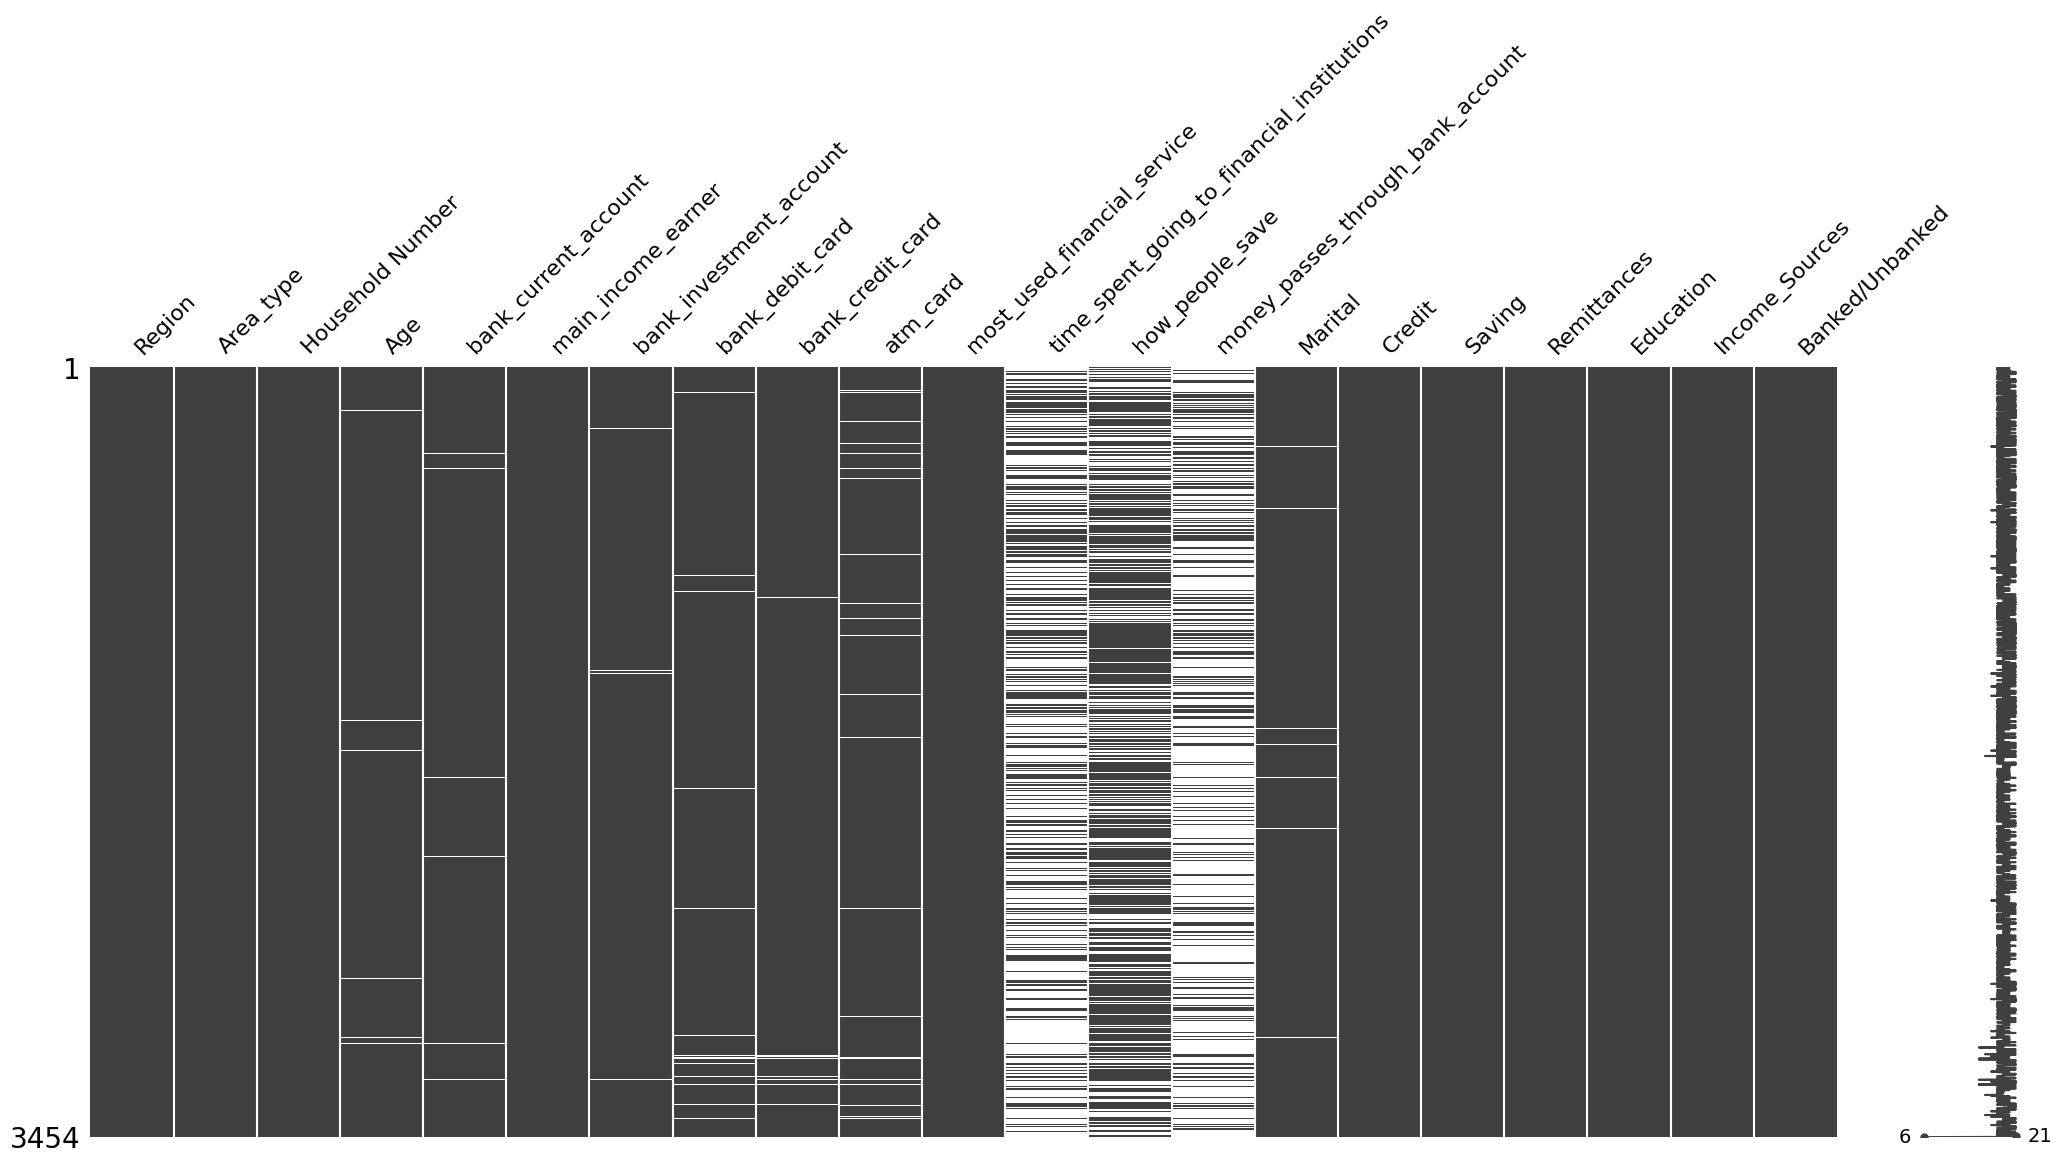

In [59]:
import missingno as msno
%matplotlib inline
msno.matrix(df)

In [60]:
df.drop(columns=['time_spent_going_to_financial_institutions', 'how_people_save', 'money_passes_through_bank_account'], inplace= True)

In [61]:
#Drop missing rows
df.dropna(inplace=True) 


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3286 entries, 0 to 3452
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Region                       3286 non-null   object 
 1   Area_type                    3286 non-null   object 
 2   Household Number             3286 non-null   float64
 3   Age                          3286 non-null   object 
 4   bank_current_account         3286 non-null   object 
 5   main_income_earner           3286 non-null   object 
 6   bank_investment_account      3286 non-null   object 
 7   bank_debit_card              3286 non-null   object 
 8   bank_credit_card             3286 non-null   object 
 9   atm_card                     3286 non-null   object 
 10  most_used_financial_service  3286 non-null   object 
 11  Marital                      3286 non-null   object 
 12  Credit                       3286 non-null   object 
 13  Saving                 

In [63]:
# categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# for col in categorical_cols:
#     if col != 'Banked/Unbanked': 
#         cross_tab = pd.crosstab(df[col], df['Banked/Unbanked'], normalize='index')
#         print(f"Cross-tab for {col}:")
#         print(cross_tab)
#         print("\n")

In [64]:
df.columns

Index(['Region', 'Area_type', 'Household Number', 'Age',
       'bank_current_account', 'main_income_earner', 'bank_investment_account',
       'bank_debit_card', 'bank_credit_card', 'atm_card',
       'most_used_financial_service', 'Marital', 'Credit', 'Saving',
       'Remittances', 'Education', 'Income_Sources', 'Banked/Unbanked'],
      dtype='object')

In [65]:
#Encoding categorical values
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Region_N'] = labelencoder.fit_transform(df['Region'])
df['Area_type_N'] = labelencoder.fit_transform(df['Area_type'])
df['Bank_DC_N'] = labelencoder.fit_transform(df['bank_debit_card'])
df['Bank_CC_N'] = labelencoder.fit_transform(df['bank_credit_card'])
df['atm_card_N'] = labelencoder.fit_transform(df['atm_card'])
df['Most_used_fs_N'] = labelencoder.fit_transform(df['most_used_financial_service'])
df['Marital_N'] = labelencoder.fit_transform(df['Marital'])
df['Credit_N'] = labelencoder.fit_transform(df['Credit'])
df['Saving_N'] = labelencoder.fit_transform(df['Saving'])
df['Remittances_N'] = labelencoder.fit_transform(df['Remittances'])
df['Education_N'] = labelencoder.fit_transform(df['Education'])
df['Income_sources_N'] = labelencoder.fit_transform(df['Income_Sources'])

In [76]:
print(df.Education.value_counts())
print('\n')
print(df.most_used_financial_service.value_counts())
print('\n')
print(df.Area_type.value_counts())
print('\n')
print(df.Remittances.value_counts())
print('\n')
print(df.Saving.value_counts())
print('\n')
print(df.Credit.value_counts())
print('\n')
print(df.Region.value_counts())
print('\n')
print(df.Income_Sources.value_counts())

Education
Primary education                  1654
No formal education                 860
Secondary education                 527
Tertiary education                  143
Vocational/Specialised training      81
Other/Dont know                      21
Name: count, dtype: int64


most_used_financial_service
None of these    2579
Bank              640
ATM                67
Name: count, dtype: int64


Area_type
Rural    1906
Urban    1380
Name: count, dtype: int64


Remittances
Not remitting                                2227
Remiting through family and friends           465
Remitting through other formal (non-bank)     273
Remitting through bank                        165
Remitting informally                          156
Name: count, dtype: int64


Saving
Saving at bank                       946
Not saving                           909
Saving at home                       894
Saving informally                    417
Saving at other formal (non-bank)    120
Name: count, dtype: int64


Cred

In [61]:
df.head()

,Region,Area_type,Household Number,Age,bank_current_account,main_income_earner,bank_investment_account,bank_debit_card,bank_credit_card,atm_card,...,Bank_DC_N,Bank_CC_N,atm_card_N,Most_used_fs_N,Marital_N,Credit_N,Saving_N,Remittances_N,Education_N,Income_sources_N
0,Greater Accra,Urban,2.0,50,Never had,Yes,Never had,Never had,Never had,Never had,...,1,1,1,2,1,1,1,0,2,2
1,Greater Accra,Urban,1.0,31,Never had,Yes,Never had,Never had,Never had,Never had,...,1,1,1,2,0,1,1,2,2,1
2,Greater Accra,Urban,4.0,32,Never had,Yes,Never had,Never had,Never had,Never had,...,1,1,1,2,2,4,4,0,3,6
3,Greater Accra,Urban,5.0,45,Never had,DK,Never had,Never had,Never had,Never had,...,1,1,1,2,1,4,1,0,0,6
4,Greater Accra,Urban,3.0,55,Never had,No,Never had,Never had,Never had,Never had,...,1,1,1,2,1,4,1,0,2,6


In [20]:
#Converting Age to an integer
df['Age'] = df['Age'].astype('int64')

ValueError: invalid literal for int() with base 10: 'Not indicated'

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 42 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 3453 non-null   float64
 1   Weight_Ind                                         3453 non-null   float64
 2   Region                                             3453 non-null   object 
 3   Area_type                                          3453 non-null   object 
 4   Household Number                                   3453 non-null   float64
 5   how_get_financial_info                             3453 non-null   object 
 6   involved_financial_decisions                       3453 non-null   object 
 7   has_money_to_spend                                 3453 non-null   object 
 8   bank_current_account                               3422 non-null   object 
 9   bank_inv

In [22]:
#Drop categorical values
df = df.drop(columns=['Region','Area_type','bank_current_account', 'main_income_earner', 'bank_investment_account', 'bank_debit_card', 'bank_credit_card', 'atm_card', 'most_used_financial_service', 'Marital', 'Credit', 'Saving', 'Remittances', 'Education', 'Income_Sources'])

In [23]:
df.columns

Index(['ID', 'Weight_Ind', 'Household Number', 'how_get_financial_info',
       'involved_financial_decisions', 'has_money_to_spend',
       'bank_savings_account', 'bank_fixed_deposit_account', 'e_zwich',
       'used_someone_else_bank_account', 'reason_using_someone_else_account',
       'reason_no_bank_account', 'how_get_to_financial_institutions',
       'other_activities_on_way_to_financial_institutions',
       'time_spent_going_to_financial_institutions', 'currently_saving',
       'how_people_save', 'how_income_received',
       'money_passes_through_bank_account',
       'reason_money_not_passing_through_banks', 'total_personal_income',
       'total_household_income', 'Age', 'Gender', 'Income', 'Banked/Unbanked',
       'Age2'],
      dtype='object')

In [66]:
#Split data and give importance to the y variable
# from sklearn.model_selection import train_test_split

X = df.drop(columns=['Banked/Unbanked']) 
y = df['Banked/Unbanked']

# X_train, X_temp, y_train, y_temp = train_test_split(
#     X, y, test_size=0.4, random_state=42, stratify=y)

# X_val, X_test, y_val, y_test = train_test_split(
#     X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# print(f"Training set size: {X_train.shape[0]}")
# print(f"Validation set size: {X_val.shape[0]}")
# print(f"Testing set size: {X_test.shape[0]}")

In [67]:
#Using chiSquared to determine feature importance
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(13,'Score'))  

               Specs       Score
11     Remittances_N  596.258375
12       Education_N  448.737923
7     Most_used_fs_N  191.336235
3        Area_type_N  180.163304
10          Saving_N  126.874903
9           Credit_N   56.801938
2           Region_N   47.800247
13  Income_sources_N   35.853774
6         atm_card_N   16.232257
1                Age    2.832313
8          Marital_N    0.826384
0   Household Number    0.483345
4          Bank_DC_N    0.103884


In [68]:
X = df.drop(columns=['Marital_N','Household Number','Bank_DC_N', 'Age','Bank_CC_N', 'Banked/Unbanked'])
y = df['Banked/Unbanked']

from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=9)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(8,'Score'))  


              Specs       Score
6     Remittances_N  596.258375
7       Education_N  448.737923
3    Most_used_fs_N  191.336235
1       Area_type_N  180.163304
5          Saving_N  126.874903
4          Credit_N   56.801938
0          Region_N   47.800247
8  Income_sources_N   35.853774


In [69]:
from sklearn.model_selection import train_test_split

X = df[['Remittances_N', 'Education_N', 'Most_used_fs_N', 'Area_type_N', 'Saving_N', 'Credit_N', 'Region_N', 'Income_sources_N']]
y = df['Banked/Unbanked']

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 1971
Validation set size: 657
Testing set size: 658


[0.06098857 0.06915025 0.28042574 0.04437541 0.41531589 0.05100581
 0.03939634 0.03934199]


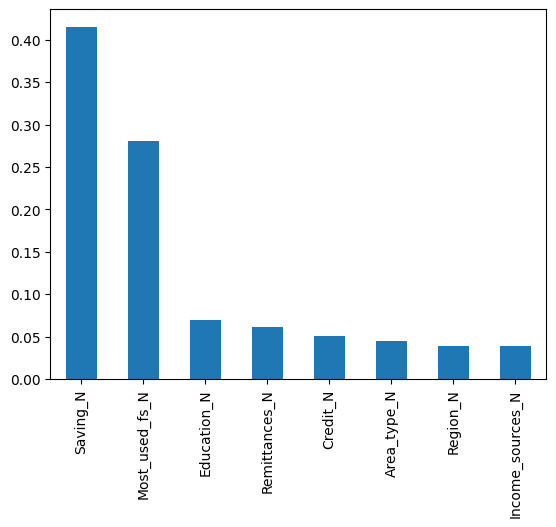

In [70]:
#Using Ensemble model to determine feature importance
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='bar')
plt.show()

In [71]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

scaler = StandardScaler()

columns = X_train.columns

X_train= scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test= scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_val = pd.DataFrame(X_val, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

logreg = LogisticRegression(random_state = 42, max_iter = 1000)
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [72]:
X_train.columns

Index(['Remittances_N', 'Education_N', 'Most_used_fs_N', 'Area_type_N',
       'Saving_N', 'Credit_N', 'Region_N', 'Income_sources_N'],
      dtype='object')

In [73]:
y_val_pred = logreg.predict(X_val)
y_val_prob = logreg.predict_proba(X_val)[:, 1]  # Probability of class 1

accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_prob)
conf_matrix = confusion_matrix(y_val, y_val_pred)

print('Baseline Logistic regression val prediction')
print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Validation Precision: {precision:.4f}")
print(f"Validation Recall: {recall:.4f}")
print(f"Validation F1-Score: {f1:.4f}")
print(f"Validation ROC-AUC: {roc_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Baseline Logistic regression val prediction
Validation Accuracy: 0.8615
Validation Precision: 0.8466
Validation Recall: 0.9681
Validation F1-Score: 0.9033
Validation ROC-AUC: 0.9007
Confusion Matrix:
[[141  77]
 [ 14 425]]


In [74]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(feature_importance)

            Feature  Coefficient
2    Most_used_fs_N     2.207231
1       Education_N    -0.553825
4          Saving_N     0.413570
5          Credit_N     0.401241
3       Area_type_N    -0.401131
0     Remittances_N    -0.277563
7  Income_sources_N    -0.208162
6          Region_N     0.113668


In [75]:
y_test_pred = logreg.predict(X_test)
y_test_prob = logreg.predict_proba(X_test)[:, 1] 

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_prob)
conf_matrix = confusion_matrix(y_test, y_test_pred)
print('Baseline Logistic regression test prediction')
print(f"Testing Accuracy: {accuracy:.4f}")
print(f"Testing Precision: {precision:.4f}")
print(f"Testing Recall: {recall:.4f}")
print(f"Testing F1-Score: {f1:.4f}")
print(f"Testing ROC-AUC: {roc_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Baseline Logistic regression test prediction
Testing Accuracy: 0.8784
Testing Precision: 0.8626
Testing Recall: 0.9727
Testing F1-Score: 0.9143
Testing ROC-AUC: 0.9104
Confusion Matrix:
[[151  68]
 [ 12 427]]


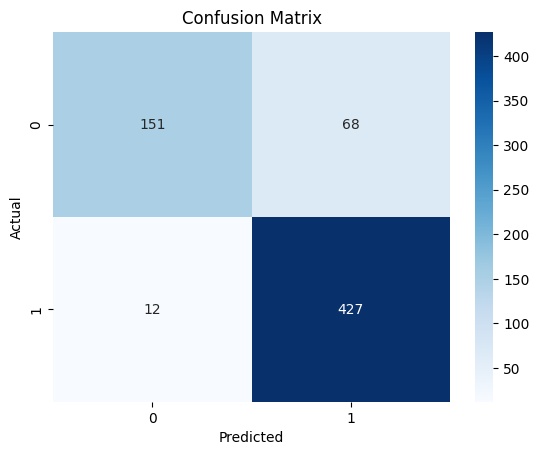

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

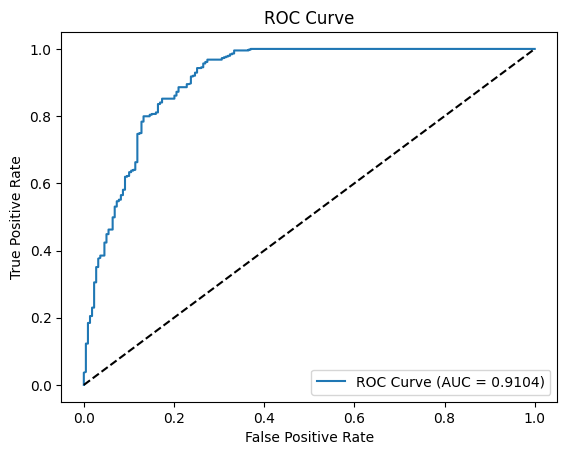

In [77]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [78]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],       # Regularization type
    'solver': ['liblinear']        # Solver compatible with L1 regularization
}

logreg = LogisticRegression(random_state=42, max_iter=1000)

grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring='f1', 
    cv=5,        
    verbose=1,
    n_jobs=-1    
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best F1-Score:", grid_search.best_score_)

best_logreg = grid_search.best_estimator_
y_val_pred_best = best_logreg.predict(X_val)
y_val_prob_best = best_logreg.predict_proba(X_val)[:, 1]

accuracy_best = accuracy_score(y_val, y_val_pred_best)
precision_best = precision_score(y_val, y_val_pred_best)
recall_best = recall_score(y_val, y_val_pred_best)
f1_best = f1_score(y_val, y_val_pred_best)
roc_auc_best = roc_auc_score(y_val, y_val_prob_best)

print("\nOptimized  Valuation Logistic Regression Performance:")
print(f"Validation Accuracy: {accuracy_best:.4f}")
print(f"Validation Precision: {precision_best:.4f}")
print(f"Validation Recall: {recall_best:.4f}")
print(f"Validation F1-Score: {f1_best:.4f}")
print(f"Validation ROC-AUC: {roc_auc_best:.4f}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Best F1-Score: 0.9131944884383909

Optimized  Valuation Logistic Regression Performance:
Validation Accuracy: 0.8539
Validation Precision: 0.8254
Validation Recall: 0.9909
Validation F1-Score: 0.9006
Validation ROC-AUC: 0.8649


In [79]:
from sklearn.pipeline import Pipeline


pipeline = Pipeline([
    ('logreg', LogisticRegression(
        penalty='l1',
        solver = 'liblinear',
        C=0.01,
        random_state=42,
        max_iter=1000
    ))
])

pipeline.fit(X_train, y_train)

y_pred_logreg = pipeline.predict(X_test)
y_proba_logreg = pipeline.predict_proba(X_test)[:, 1]

In [80]:
y_test_best_pred = best_logreg.predict(X_test)
y_test_prob_best = best_logreg.predict_proba(X_test)[:,1]

accuracy_best = accuracy_score(y_test, y_test_best_pred)
precision_best = precision_score(y_test, y_test_best_pred)
recall_best = recall_score(y_test, y_test_best_pred)
f1_best = f1_score(y_test, y_test_best_pred)
roc_auc_best = roc_auc_score(y_test, y_test_prob_best)

print("\nOptimized Test Logistic Regression Performance:")
print(f"Validation Accuracy: {accuracy_best:.4f}")
print(f"Validation Precision: {precision_best:.4f}")
print(f"Validation Recall: {recall_best:.4f}")
print(f"Validation F1-Score: {f1_best:.4f}")
print(f"Validation ROC-AUC: {roc_auc_best:.4f}")




Optimized Test Logistic Regression Performance:
Validation Accuracy: 0.8784
Validation Precision: 0.8485
Validation Recall: 0.9954
Validation F1-Score: 0.9161
Validation ROC-AUC: 0.8984


In [82]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score

print('\tLogistic Regression Baseline Validation Result')
print(classification_report(y_val, y_val_pred_best))
print('ROC - AUC Score: ', roc_auc_score(y_val, y_val_prob_best))
print('\n')
print('='*55)
print('\tLogistic Regression Baseline Test Result')
print(classification_report(y_test, y_test_best_pred))#
print('ROC - AUC Score: ', roc_auc_score(y_test, y_test_prob_best))

	Logistic Regression Baseline Validation Result
              precision    recall  f1-score   support

           0       0.97      0.58      0.72       218
           1       0.83      0.99      0.90       439

    accuracy                           0.85       657
   macro avg       0.90      0.78      0.81       657
weighted avg       0.87      0.85      0.84       657

ROC - AUC Score:  0.8649401266431214


	Logistic Regression Baseline Test Result
              precision    recall  f1-score   support

           0       0.99      0.64      0.78       219
           1       0.85      1.00      0.92       439

    accuracy                           0.88       658
   macro avg       0.92      0.82      0.85       658
weighted avg       0.89      0.88      0.87       658

ROC - AUC Score:  0.8983576205781093


In [83]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': best_logreg.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(feature_importance)

            Feature  Coefficient
2    Most_used_fs_N     1.538253
1       Education_N    -0.199402
3       Area_type_N    -0.134471
0     Remittances_N     0.000000
4          Saving_N     0.000000
5          Credit_N     0.000000
6          Region_N     0.000000
7  Income_sources_N     0.000000


In [110]:
Most_used_fs_N.unique()

NameError: name 'Most_used_fs_N' is not defined

In [84]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score

adaboost_baseline = AdaBoostClassifier(random_state= 42)
adaboost_baseline.fit(X_train, y_train)

adaboost_baseline_val = adaboost_baseline.predict(X_val)
adaboost_baseline_val_prob = adaboost_baseline.predict_proba(X_val)[:,1]

adaboost_baseline_pred = adaboost_baseline.predict(X_test)
adaboost_baseline_pred_prob = adaboost_baseline.predict_proba(X_test)[:,1]

print('\tAdaboost Baseline Validation Result')
print(classification_report(y_val, adaboost_baseline_val))
print('ROC - AUC Score: ', roc_auc_score(y_val, adaboost_baseline_val_prob))
print('\n')
print('='*55)
print('\tAdaboost Baseline Test Result')
print(classification_report(y_test, adaboost_baseline_pred))#
print('ROC - AUC Score: ', roc_auc_score(y_test, adaboost_baseline_pred_prob))


	Adaboost Baseline Validation Result
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       218
           1       0.95      0.99      0.97       439

    accuracy                           0.96       657
   macro avg       0.97      0.94      0.95       657
weighted avg       0.96      0.96      0.96       657

ROC - AUC Score:  0.9622369438465235


	Adaboost Baseline Test Result
              precision    recall  f1-score   support

           0       0.99      0.90      0.95       219
           1       0.95      1.00      0.98       439

    accuracy                           0.97       658
   macro avg       0.97      0.95      0.96       658
weighted avg       0.97      0.97      0.97       658

ROC - AUC Score:  0.9791660165798151


In [87]:
import joblib

joblib.dump(best_adaboost, 'adaboost_model.pkl')

['adaboost_model.pkl']

In [88]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

knn_baseline_val = knn.predict(X_val)
knn_baseline_val_prob = knn.predict_proba(X_val)[:,1]

knn_baseline_pred = knn.predict(X_test)
knn_baseline_pred_prob = knn.predict_proba(X_test)[:,1]

print('\tknn Baseline Validation Result')
print(classification_report(y_val, knn_baseline_val))
print('ROC - AUC Score: ', roc_auc_score(y_val, knn_baseline_val_prob))
print('\n')
print('='*55)
print('\tknn Baseline Test Result')
print(classification_report(y_test, knn_baseline_pred))#
print('ROC - AUC Score: ', roc_auc_score(y_test, knn_baseline_pred_prob))


	knn Baseline Validation Result
              precision    recall  f1-score   support

           0       0.93      0.78      0.85       218
           1       0.90      0.97      0.93       439

    accuracy                           0.91       657
   macro avg       0.91      0.88      0.89       657
weighted avg       0.91      0.91      0.91       657

ROC - AUC Score:  0.9236013876408016


	knn Baseline Test Result
              precision    recall  f1-score   support

           0       0.94      0.80      0.87       219
           1       0.91      0.97      0.94       439

    accuracy                           0.92       658
   macro avg       0.92      0.89      0.90       658
weighted avg       0.92      0.92      0.92       658

ROC - AUC Score:  0.9348508960797163


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

knn_baseline_val = knn.predict(X_val)
knn_baseline_val_prob = knn.predict_proba(X_val)[:,1]

knn_baseline_pred = knn.predict(X_test)
knn_baseline_pred_prob = knn.predict_proba(X_test)[:,1]

print('\tknn Baseline Validation Result')
print(classification_report(y_val, knn_baseline_val))
print('ROC - AUC Score: ', roc_auc_score(y_val, knn_baseline_val_prob))
print('\n')
print('='*55)
print('\tknn Baseline Test Result')
print(classification_report(y_test, knn_baseline_pred))#
print('ROC - AUC Score: ', roc_auc_score(y_test, knn_baseline_pred_prob))


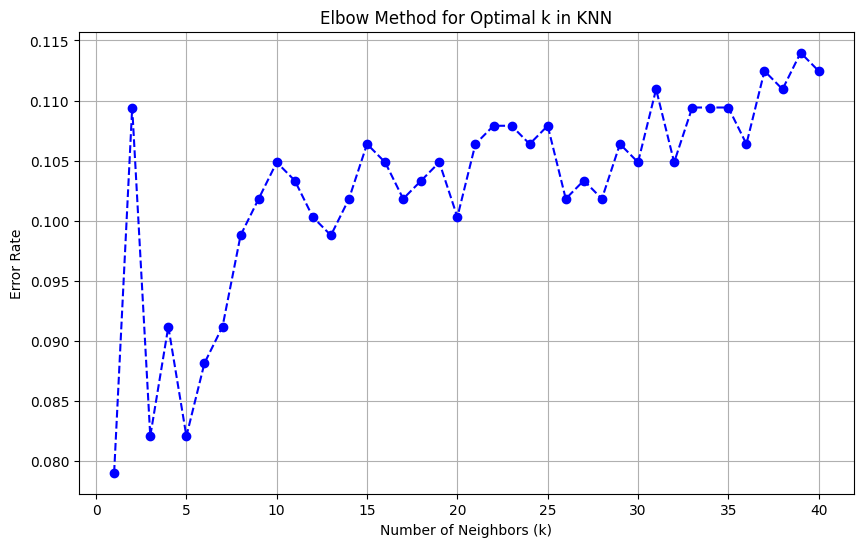

In [89]:
error_rates = []
k_values = range(1, 41)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    error = 1 - accuracy_score(y_test, preds)
    error_rates.append(error)

# Plotting the elbow curve
plt.figure(figsize=(10,6))
plt.plot(k_values, error_rates, marker='o', linestyle='dashed', color='blue')
plt.title('Elbow Method for Optimal k in KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

In [90]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)

knn_baseline_val = knn.predict(X_val)
knn_baseline_val_prob = knn.predict_proba(X_val)[:,1]

knn_baseline_pred = knn.predict(X_test)
knn_baseline_pred_prob = knn.predict_proba(X_test)[:,1]

print('\tknn Baseline Validation Result')
print(classification_report(y_val, knn_baseline_val))
print('ROC - AUC Score: ', roc_auc_score(y_val, knn_baseline_val_prob))
print('\n')
print('='*55)
print('\tknn Baseline Test Result')
print(classification_report(y_test, knn_baseline_pred))#
print('ROC - AUC Score: ', roc_auc_score(y_test, knn_baseline_pred_prob))


	knn Baseline Validation Result
              precision    recall  f1-score   support

           0       0.91      0.72      0.80       218
           1       0.87      0.96      0.92       439

    accuracy                           0.88       657
   macro avg       0.89      0.84      0.86       657
weighted avg       0.88      0.88      0.88       657

ROC - AUC Score:  0.9257434536373326


	knn Baseline Test Result
              precision    recall  f1-score   support

           0       0.94      0.75      0.83       219
           1       0.89      0.97      0.93       439

    accuracy                           0.90       658
   macro avg       0.91      0.86      0.88       658
weighted avg       0.90      0.90      0.90       658

ROC - AUC Score:  0.9339615772667229


In [86]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50,100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}

adaboost = AdaBoostClassifier(random_state = 42)

grid_search = GridSearchCV(
    estimator = adaboost,
    param_grid = param_grid,
    cv = 5,
    scoring = 'f1',
    verbose = 1,
    n_jobs = -1
)

grid_search.fit(X_train, y_train)

print('Best params are ', grid_search.best_params_)
print('Best Score ', grid_search.best_score_)

best_adaboost = grid_search.best_estimator_
y_val_pred_best = best_adaboost.predict(X_val)
y_val_pred_best_prob = best_adaboost.predict_proba(X_val)[:,1]

y_test_pred_best = best_adaboost.predict(X_test)
y_test_pred_best_prob = best_adaboost.predict_proba(X_test)[:,1]

print('\tOptimized Adaboost Validation Result')
print(classification_report(y_test, y_test_pred_best))
print('ROC-AUC score: ', roc_auc_score(y_test, y_test_pred_best_prob))
print('\n')
print('\tOptimized Adaboost Test Result')
print(classification_report(y_test, y_test_pred_best))
print('ROC-AUC score: ', roc_auc_score(y_test, y_test_pred_best_prob))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best params are  {'learning_rate': 0.5, 'n_estimators': 100}
Best Score  0.9750640701034184
	Optimized Adaboost Validation Result
              precision    recall  f1-score   support

           0       0.99      0.90      0.95       219
           1       0.95      1.00      0.98       439

    accuracy                           0.97       658
   macro avg       0.97      0.95      0.96       658
weighted avg       0.97      0.97      0.97       658

ROC-AUC score:  0.979769297178103


	Optimized Adaboost Test Result
              precision    recall  f1-score   support

           0       0.99      0.90      0.95       219
           1       0.95      1.00      0.98       439

    accuracy                           0.97       658
   macro avg       0.97      0.95      0.96       658
weighted avg       0.97      0.97      0.97       658

ROC-AUC score:  0.979769297178103


In [91]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.utils.class_weight import compute_class_weight
from pytorch_lightning.callbacks import EarlyStopping
from pytorch_lightning import Trainer
import numpy as np
from torch.optim import AdamW
import pytorch_lightning as pl

In [92]:
X_train_tensor = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
X_val_tensor = torch.tensor(X_val.to_numpy(), dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.to_numpy(), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [93]:
class Baseline(pl.LightningModule):
    def __init__(self, input_dim, hidden_dim=64, dropout_rate=0.3):
        super(Baseline, self).__init__()
        self.save_hyperparameters()
        
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim // 2)
        self.fc3 = nn.Linear(hidden_dim // 2, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        #print("Input shape:", x.shape)
        x = self.relu(self.fc1(x))
        #print("After fc1:", x.shape)
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        #print("After fc2:", x.shape)
        x = self.dropout(x)
        x = self.sigmoid(self.fc3(x))
        #print("Output shape:", x.shape)
        return x.squeeze(-1)

In [94]:
print(X_train_tensor.shape)

torch.Size([1971, 8])


In [95]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience= 10,
    mode='min',
    verbose = True,
    check_on_train_epoch_end = False
)
trainer = Trainer(callbacks=[early_stopping], max_epochs = 100, accelerator = 'gpu')

Using device: cuda
Epoch [10/100], Loss: 0.2950
Epoch [20/100], Loss: 0.2426
Epoch [30/100], Loss: 0.2167
Epoch [40/100], Loss: 0.1866
Epoch [50/100], Loss: 0.1687
Epoch [60/100], Loss: 0.1610
Epoch [70/100], Loss: 0.1519
Epoch [80/100], Loss: 0.1398
Epoch [90/100], Loss: 0.1449
Epoch [100/100], Loss: 0.1336


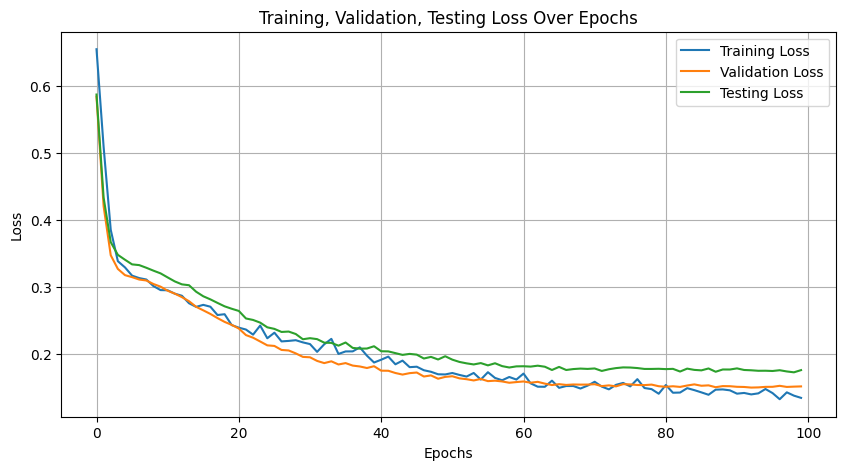

In [96]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") #To use GPU
print(f"Using device: {device}")
input_dim = X_train.shape[1]
hidden_dim = 64
output_dim = 1

model = Baseline(input_dim).to(device)


criterion = nn.BCELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)

def train_model(model, criterion, optimizer, train_loader, val_loader, test_loader, epochs = 50):
    train_losses, val_losses, test_losses = [], [], []
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for batch_x, batch_y in train_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device) #To move to GPU
            outputs = model(batch_x)
            loss = criterion(outputs.squeeze(), batch_y.squeeze())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        train_loss = running_loss / len(train_loader)
        train_losses.append(train_loss)

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for batch_x, batch_y in val_loader:
                batch_x, batch_y = batch_x.to(device), batch_y.to(device)
                outputs = model(batch_x)
                loss = criterion(outputs.squeeze(), batch_y.squeeze())
                val_loss += loss.item()
        val_loss /= len(val_loader)
        val_losses.append(val_loss)

        test_loss = 0.0
        with torch.no_grad():
            for batch_x, batch_y in test_loader:
                batch_x, batch_y =  batch_x.to(device), batch_y.to(device)
                outputs = model(batch_x)
                loss = criterion(outputs.squeeze(), batch_y.squeeze())
                test_loss += loss.item()
        test_loss /= len(test_loader)
        test_losses.append(test_loss)

        if (epoch +1) % 10 == 0:
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}')

    return train_losses, val_losses, test_losses

train_losses, val_losses, test_losses = train_model(model, criterion, optimizer, train_loader, val_loader, test_loader, epochs= 100)


plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.plot(test_losses, label= 'Testing Loss')
plt.title('Training, Validation, Testing Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [97]:
def evaluate_model(model, test_loader):
    model.eval()
    y_true, y_pred_prob = [], []
    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)
            outputs = model(batch_x)
            y_pred_prob.extend(outputs.cpu().numpy().flatten())
            y_true.extend(batch_y.cpu().numpy().flatten())

    y_pred = (np.array(y_pred_prob) > 0.5).astype(int)

    print('Baseline Neural Network Report')
    print('Classification Report:')
    print(classification_report(y_true, y_pred))
    print('ROC-AUC Score: ', roc_auc_score(y_true, y_pred_prob))

evaluate_model(model, test_loader)

Baseline Neural Network Report
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.88      0.94       219
         1.0       0.94      1.00      0.97       439

    accuracy                           0.96       658
   macro avg       0.97      0.94      0.95       658
weighted avg       0.96      0.96      0.96       658

ROC-AUC Score:  0.9731384112917487


In [98]:
!pip install skorch; 
!pip install skopt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 kB 5.9 MB/s eta 0:00:0000:01
ERROR: Could not find a version that satisfies the requirement skopt (from versions: none)
ERROR: No matching distribution found for skopt


In [99]:
from skopt import BayesSearchCV
from skorch import NeuralNetClassifier
from skopt.space import Real, Integer, Categorical

net = NeuralNetClassifier(
    module = Baseline,
    module__input_dim = input_dim,
    criterion = nn.BCELoss,
    optimizer = optim.AdamW,
    lr= 0.001,
    max_epochs = 50,
    batch_size = 64,
    device = device
)

param_space = {
    'lr': Real(1e-4,1e-2,prior='log-uniform'),
    'module__hidden_dim': Integer(32, 128),
    'module__dropout_rate': Real(0.1, 0.5),  
    'optimizer__weight_decay': Real(1e-5, 1e-3, prior='log-uniform'),
    'batch_size': Categorical([32,62,128])
    
    
}

bayes_search = BayesSearchCV(
    estimator = net,
    search_spaces = param_space,
    n_iter = 30,
    cv = 3,
    scoring = 'roc_auc',
    random_state = 42,
    verbose = 1,
    n_jobs =-1
)

bayes_search.fit(X_train_tensor, y_train_tensor)

print('Best Parameters:', bayes_search.best_params_)
print('Best ROC-AUC score:', bayes_search.best_score_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

In [100]:
import pytorch_lightning as pl
import torch
import torch.nn as nn
import torch.optim as optim

class Baseline(pl.LightningModule):
    def __init__(self, input_dim, hidden_dim=32, dropout_rate=0.5, learning_rate=0.01):
        super(Baseline, self).__init__()
        self.save_hyperparameters()  # Save hyperparameters for logging
        
        # Define the layers
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim // 2)
        self.fc3 = nn.Linear(hidden_dim // 2, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(dropout_rate)
        
        # Learning rate
        self.learning_rate = learning_rate

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.sigmoid(self.fc3(x)).squeeze(-1)  # Squeeze to match target shape
        return x

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = nn.BCELoss()(y_hat, y)
        self.log("train_loss", loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = nn.BCELoss()(y_hat, y)
        self.log("val_loss", loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        return loss

    def configure_optimizers(self):
        optimizer = optim.AdamW(self.parameters(), lr=self.learning_rate, weight_decay=1e-4)
        return optimizer

    def train_dataloader(self):
        # Return the training DataLoader
        return self._train_loader

    def val_dataloader(self):
        # Return the validation DataLoader
        return self._val_loader

    def set_loaders(self, train_loader, val_loader):
        # Set the DataLoader instances
        self._train_loader = train_loader
        self._val_loader = val_loader

In [101]:
X_train_tensor = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
X_val_tensor = torch.tensor(X_val.to_numpy(), dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.to_numpy(), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 126
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [102]:
print(X_train_tensor.shape)

torch.Size([1971, 8])


Using device: cuda
Epoch [10/100], Loss: 0.2932
Epoch [20/100], Loss: 0.1857
Epoch [30/100], Loss: 0.1728
Epoch [40/100], Loss: 0.1853
Epoch [50/100], Loss: 0.1690
Epoch [60/100], Loss: 0.1604
Epoch [70/100], Loss: 0.1547
Epoch [80/100], Loss: 0.1718
Epoch [90/100], Loss: 0.1693
Epoch [100/100], Loss: 0.1634


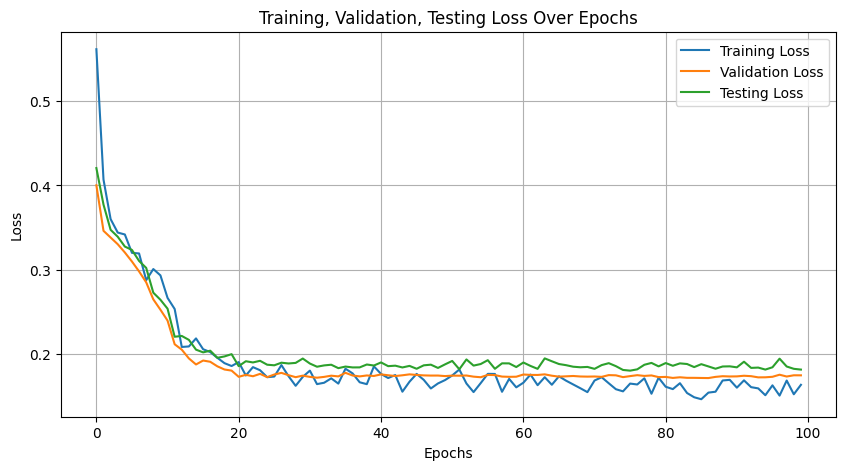

In [103]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") #To use GPU
print(f"Using device: {device}")
input_dim = X_train.shape[1]
hidden_dim = 32
output_dim = 1

model = Baseline(input_dim).to(device)


criterion = nn.BCELoss()
optimizer = optim.AdamW(model.parameters(),lr= 0.01, weight_decay=1e-05)

def train_model(model, criterion, optimizer, train_loader, val_loader, test_loader, epochs = 50):
    train_losses, val_losses, test_losses = [], [], []
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for batch_x, batch_y in train_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device) #To move to GPU
            outputs = model(batch_x)

            outputs = outputs.squeeze(-1) if outputs.dim() > 1 else outputs
            batch_y = batch_y.squeeze(-1) if batch_y.dim() > 1 else batch_y
            loss = criterion(outputs, batch_y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        train_loss = running_loss / len(train_loader)
        train_losses.append(train_loss)

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for batch_x, batch_y in val_loader:
                batch_x, batch_y = batch_x.to(device), batch_y.to(device)
                outputs = model(batch_x)
                outputs = outputs.squeeze(-1) if outputs.dim() > 1 else outputs
                batch_y = batch_y.squeeze(-1) if batch_y.dim() > 1 else batch_y
                loss = criterion(outputs, batch_y)
                val_loss += loss.item()
        val_loss /= len(val_loader)
        val_losses.append(val_loss)

        test_loss = 0.0
        with torch.no_grad():
            for batch_x, batch_y in test_loader:
                batch_x, batch_y =  batch_x.to(device), batch_y.to(device)
                outputs = model(batch_x)
                outputs = outputs.squeeze(-1) if outputs.dim() > 1 else outputs
                batch_y = batch_y.squeeze(-1) if batch_y.dim() > 1 else batch_y
                loss = criterion(outputs, batch_y)
                test_loss += loss.item()
        test_loss /= len(test_loader)
        test_losses.append(test_loss)

        if (epoch +1) % 10 == 0:
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}')

    return train_losses, val_losses, test_losses

train_losses, val_losses, test_losses = train_model(model, criterion, optimizer, train_loader, val_loader, test_loader, epochs= 100)


plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.plot(test_losses, label= 'Testing Loss')
plt.title('Training, Validation, Testing Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [104]:
def evaluate_model(model, test_loader):
    model.eval()
    y_true, y_pred_prob = [], []
    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)
            outputs = model(batch_x)
            y_pred_prob.extend(outputs.cpu().numpy().flatten())
            y_true.extend(batch_y.cpu().numpy().flatten())

    y_pred = (np.array(y_pred_prob) > 0.5).astype(int)

    
    print('\tOptimized Neural Network report')
    print('Classification Report:')
    print(classification_report(y_true, y_pred))
    print('ROC-AUC Score: ', roc_auc_score(y_true, y_pred_prob))

evaluate_model(model, test_loader)

	Optimized Neural Network report
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.88      0.94       219
         1.0       0.94      1.00      0.97       439

    accuracy                           0.96       658
   macro avg       0.97      0.94      0.95       658
weighted avg       0.96      0.96      0.96       658

ROC-AUC Score:  0.9731696154606256


In [105]:
from pytorch_lightning import LightningDataModule
from torch.utils.data import DataLoader

class MyDataModule(LightningDataModule):
    def __init__(self, train_dataset, val_dataset, test_dataset, batch_size=64):
        super().__init__()
        self.train_dataset = train_dataset
        self.val_dataset = val_dataset
        self.test_dataset = test_dataset
        self.batch_size = batch_size

    def train_dataloader(self):
        return DataLoader(self.train_dataset, batch_size=self.batch_size, shuffle=True)

    def val_dataloader(self):
        return DataLoader(self.val_dataset, batch_size=self.batch_size)

    def test_dataloader(self):
        return DataLoader(self.test_dataset, batch_size=self.batch_size)

# Initialize the DataModule
data_module = MyDataModule(train_dataset, val_dataset, test_dataset, batch_size=64)

# Train the model
trainer.fit(model, datamodule=data_module)

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:310: The number of training batches (31) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

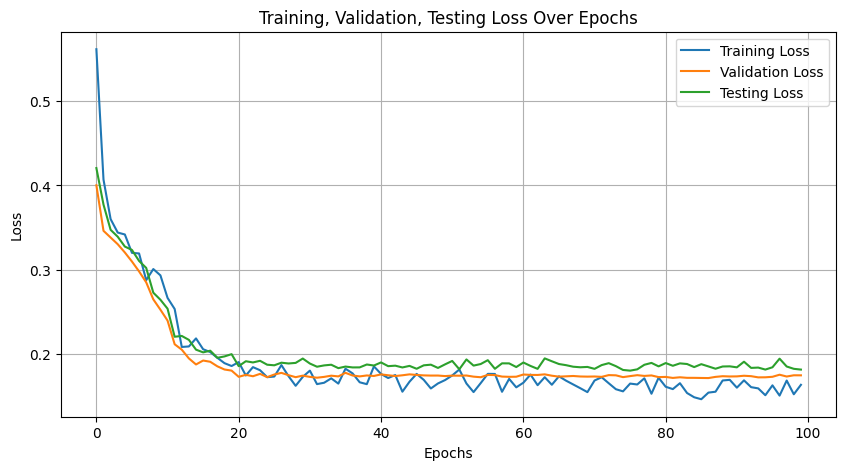

In [106]:
plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.plot(test_losses, label= 'Testing Loss')
plt.title('Training, Validation, Testing Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [107]:
print("Columns in X_train:", X.columns)

Columns in X_train: Index(['Remittances_N', 'Education_N', 'Most_used_fs_N', 'Area_type_N',
       'Saving_N', 'Credit_N', 'Region_N', 'Income_sources_N'],
      dtype='object')


In [108]:
torch.save(model, 'Credit_model.h5')

In [109]:
print(X_train_tensor.shape)

import shap

model = model.to('cuda')

X_train_tensor = X_train_tensor.to('cuda')

explainer = shap.GradientExplainer(model, X_train_tensor)

shap_values = explainer.shap_values(X_train_tensor) 

shap.summary_plot(shap_values, X_train_tensor, feature_names=X_train.columns) #ploting how model arrived at decision, key features that the model uses


torch.Size([1971, 8])


IndexError: too many indices for tensor of dimension 1

In [ ]:
import pandas as pd

data = {
    "Metric": [
        "Accuracy",
        "Precision (0)",
        "Recall (0)",
        "F1-Score (0)",
        "Precision (1)",
        "Recall (1)",
        "F1-Score (1)",
        "ROC-AUC Score",
    ],
    "Logistic Regression": ["88%", 0.83, 0.79, 0.81, 0.90, 0.92, 0.91, 0.928],
    "AdaBoost Classifier": ["95%", 0.93, 0.90, 0.92, 0.95, 0.97, 0.96, 0.959],
    "RNN": ["96%", 0.98, 0.89, 0.94, 0.95, 0.99, 0.97, "Likely > 0.95"],
}

df_comparison = pd.DataFrame(data)
display(df_comparison)

In [ ]:
metrics = ["Accuracy", "Precision (0)", "Recall (0)", "F1-Score (0)", "Precision (1)", "Recall (1)", "F1-Score (1)"]
logistic = [88, (0.83 /1) * 100, (0.79/1) * 100, (0.81 /1) * 100, (0.90 /1) * 100, (0.92/1) * 100, (0.91/1) * 100]
adaboost = [95, (0.93 / 1) * 100, (0.90/1) * 100, (0.92/1) * 100, (0.95 /1) *100, (0.97/1)*100, (0.96/1)*100]
rnn = [96, (0.98/1)*100, (0.89 /1) * 100, (0.94 /1 )*100, (0.95/1) * 100, (0.99/1) *100, (0.97 /1) * 100]

x = np.arange(len(metrics)) 
width = 0.25 

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width, logistic, width, label="Logistic Regression")
rects2 = ax.bar(x, adaboost, width, label="AdaBoost Classifier")
rects3 = ax.bar(x + width, rnn, width, label="RNN")

ax.set_ylabel("Scores")
ax.set_title("Model Performance Comparison")
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()